# Modelos estocásticos y simulación en computación y comunicaciones
# 2020-1
## Sistemas de recomendaciones de Twitter usando redes sociales 

In [17]:
import subprocess
import os.path
from os import path
from time import time
import pickle

In [18]:
def save_data(filename, friends):  
    with open(filename, 'wb') as fp:
        pickle.dump(friends, fp)


def load_data(filename):
    with open(filename, 'rb') as fp:
        data = pickle.load(fp)
    return data

def get_friends(username, overwrite=False):
    print("trying with: " + username)
    friend_path = os.path.join("friends_data" , username + ".txt")
    if os.path.exists(friend_path) and overwrite:
        os.remove(friend_path)
    if not path.exists(friend_path):
        friendlist = []
        attempts = 0
        while not friendlist and attempts < 5:
            start = time()
            clicommand = subprocess.run(["twint", "-u", username, "--following"], stdout=subprocess.PIPE)    #twint -u username --followers
            friends = clicommand.stdout.decode("utf-8")
            friendlist = friends.splitlines()
            final_time = time() - start  
            print(f"saving {username} friends took: {final_time // 60 :.0f}m {final_time % 60 :.0f}s")
            save_data(friend_path, friendlist)
            attempts += 1
        return friendlist
    else:
        return load_data(friend_path)


In [19]:
profile = "BumaEl"

In [20]:
friendlist = get_friends(profile, True)
friendlist

trying with: BumaEl
saving BumaEl friends took: 0m 7s
saving BumaEl friends took: 0m 18s


['thegeekyperve',
 'rule34paheal',
 'adangelavargas',
 'imblessed_damn',
 'LarreguiSalma',
 'fernandap0blete',
 'wagner_alvear',
 'SexIntellectEv',
 'davis__bates',
 '1235Umeshbansal',
 'LiubovYIlina40',
 'YouBetterPap',
 'BrentSklar',
 'reduced2ashes',
 'MrJamyes',
 'RosaAlvaradoHN',
 'isettakev',
 'DesterovObando',
 'sunsetcloud_',
 'farikiriki',
 'ldobartra',
 '02313_133Mandy',
 'bmyersss',
 'Perritonii',
 'joaltebe',
 'ElEddyThor',
 'chocochipspao',
 'sofianutria',
 'milimetrito',
 'MaraFer88633966',
 'NatyBarrios_',
 'maryneyla_',
 'andreadhc2',
 'Valentinah_29',
 'ClavijoPichler',
 'camilafrancoh8',
 'NHiguaran',
 'anniecerrato1',
 'UglyForeverr',
 'AlobienPerro',
 'Ohayousoroooo',
 'PhillipDSX',
 'DatenshiYohane5',
 'tejon_don',
 'Alejo_Higuaran',
 'CamilAcevedo654',
 'DillionHarper',
 'SashaGrey',
 'juanitta_r',
 'nilomandeDior',
 'JBalvinCucutaFc',
 'JBALVIN',
 'OlivasRickardo',
 'coach_marcela',
 'MemesMcLovin',
 'MaraUrl',
 'MillosFCoficial',
 'AsoDeporCali',
 'unlocodel77',

In [21]:
for friend in friendlist:
    get_friends(friend)

trying with: thegeekyperve
trying with: rule34paheal
trying with: adangelavargas
trying with: imblessed_damn
trying with: LarreguiSalma
trying with: fernandap0blete
trying with: wagner_alvear
trying with: SexIntellectEv
trying with: davis__bates
trying with: 1235Umeshbansal
trying with: LiubovYIlina40
trying with: YouBetterPap
trying with: BrentSklar
trying with: reduced2ashes
trying with: MrJamyes
trying with: RosaAlvaradoHN
trying with: isettakev
trying with: DesterovObando
trying with: sunsetcloud_
trying with: farikiriki
trying with: ldobartra
trying with: 02313_133Mandy
trying with: bmyersss
trying with: Perritonii
trying with: joaltebe
trying with: ElEddyThor
trying with: chocochipspao
trying with: sofianutria
trying with: milimetrito
trying with: MaraFer88633966
trying with: NatyBarrios_
trying with: maryneyla_
trying with: andreadhc2
trying with: Valentinah_29
trying with: ClavijoPichler
trying with: camilafrancoh8
trying with: NHiguaran
trying with: anniecerrato1
trying with: 

In [22]:
len(friendlist)

100

In [23]:
import networkx as nx

data_directory = "friends_data"
SocialNetwork = nx.DiGraph()

# Carga los amigos de todos, excepto los propios como nodo en el grafo
for filename in os.listdir(data_directory):
    friend_path = os.path.join(data_directory , filename)
    if (filename != profile + ".txt"):
         with open(friend_path, 'rb') as f:
            screen_name = filename.replace(".txt","")
            friends = pickle.load(f)
            
            SocialNetwork.add_node(screen_name,is_friend=True)

            #Añade los amigos de los amigos 
            for friend in friends:
                    # si la persona esta en la lista propia de amigos, marca el flag de is_friend en verdadero
                    if friend in friendlist:
                        is_friend = True
                    else:
                        is_friend = False

                    SocialNetwork.add_node(friend, is_friend = is_friend)
                    SocialNetwork.add_edge(screen_name,friend)

In [24]:
# se busca los nodos de mayor grado, filtrando por aquellos que son amigos de la persona, con el fin de crear la lista de recomendaciones
degrees = [{"screen_name": n[0],  "degrees": list(nx.degree(SocialNetwork,n))[0][1]} for n in nx.get_node_attributes(SocialNetwork,'is_friend').items() if n[1] == False]
sorted_degrees = sorted(degrees, key=lambda k:k["degrees"], reverse=True)

# se saca el top 50
top_50 = sorted_degrees[1:50]
top_50

[{'screen_name': 'auronplay', 'degrees': 14},
 {'screen_name': 'ArianaGrande', 'degrees': 14},
 {'screen_name': 'BarackObama', 'degrees': 13},
 {'screen_name': 'justinbieber', 'degrees': 13},
 {'screen_name': 'CNNEE', 'degrees': 13},
 {'screen_name': 'Rubiu5', 'degrees': 12},
 {'screen_name': 'sanbenito', 'degrees': 12},
 {'screen_name': 'realDonaldTrump', 'degrees': 11},
 {'screen_name': 'shakira', 'degrees': 11},
 {'screen_name': 'NASA', 'degrees': 11},
 {'screen_name': 'petrogustavo', 'degrees': 10},
 {'screen_name': 'MinSaludCol', 'degrees': 10},
 {'screen_name': 'IvanDuque', 'degrees': 10},
 {'screen_name': 'LuisitoComunica', 'degrees': 10},
 {'screen_name': 'KylieJenner', 'degrees': 10},
 {'screen_name': 'DanielSamperO', 'degrees': 9},
 {'screen_name': 'MileyCyrus', 'degrees': 9},
 {'screen_name': 'IbaiLlanos', 'degrees': 9},
 {'screen_name': 'IndirectasRock', 'degrees': 9},
 {'screen_name': 'cejaspobladas', 'degrees': 8},
 {'screen_name': 'Residente', 'degrees': 8},
 {'screen_na

In [25]:
# Crear un nuevo grafo con las 50 recomendaciones de amigo
data_directory = "friends_data"
FavoriteSocialNetwork = nx.DiGraph()

# Se carga la persona en el grafo
FavoriteSocialNetwork.add_node(profile, friend_tier=0)

# se añaden los amigos     
with open(os.path.join(data_directory , profile + ".txt") , 'rb') as f:
        friends = pickle.load(f)
        for friend in friends:
            FavoriteSocialNetwork.add_node(friend, friend_tier=1)
            FavoriteSocialNetwork.add_edge(profile,friend)

# se añaden los amigos de los amigos que aparecen en el top 50
for filename in os.listdir(data_directory):
    friend_path = os.path.join(data_directory , filename)
    if (filename != profile + ".txt"):
        with open(friend_path, 'rb') as f:
            screen_name = filename.replace(".txt","")
            friends = pickle.load(f)

            for friend in friends:
                    # se agregan solo los amigos que estan en el top 50
                    if any(d["screen_name"] == friend for d in top_50):  
                        FavoriteSocialNetwork.add_node(friend, friend_tier=2)
                        FavoriteSocialNetwork.add_edge(screen_name,friend)

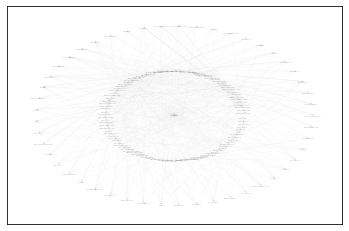

In [26]:
import matplotlib.pyplot as plt

# se declaran los nodos del grafo en forma de circulos
shell_level_1 = []
shell_level_2 = []

# se pone el nodo a su respectivo circulo
for n in nx.get_node_attributes(FavoriteSocialNetwork,'friend_tier').items():
    if n[1] == 2:
        shell_level_2.append(n[0])
    else:
        shell_level_1.append(n[0])

shells = [shell_level_1,shell_level_2]
pos = nx.shell_layout(FavoriteSocialNetwork,shells,scale=500)
pos[profile] =[0,0]

nx.draw_networkx(FavoriteSocialNetwork,pos= pos,node_size=1,node_color="#cfcfcf",alpha=.3,arrowsize=1,font_size=2,width=.1,edge_color="#bdbdbd")
plt.savefig("RecomendationGraph.png", dpi=1000)
plt.show()

In [27]:
shell_level_1 = []
shell_level_2 = []

# Add nodes to the appropriate circle
for n in nx.get_node_attributes(FavoriteSocialNetwork,'friend_tier').items():
    if n[1] == 2:
        shell_level_2.append(n[0])
    else:
        shell_level_1.append(n[0])
shells = [shell_level_1,shell_level_2]
pos = nx.shell_layout(FavoriteSocialNetwork,shells,scale=500)
pos

{'BumaEl': array([ 2.50000000e+02, -9.03659554e-07]),
 'thegeekyperve': array([249.5164032 ,  15.54240799]),
 'rule34paheal': array([248.06747437,  31.02468872]),
 'adangelavargas': array([245.65881348,  46.38694   ]),
 'imblessed_damn': array([242.29974365,  61.56972885]),
 'LarreguiSalma': array([238.00328064,  76.51431274]),
 'fernandap0blete': array([232.78601074,  91.16287994]),
 'wagner_alvear': array([226.66815186, 105.45875549]),
 'SexIntellectEv': array([219.6733551 , 119.34663391]),
 'davis__bates': array([211.82867432, 132.77278137]),
 '1235Umeshbansal': array([203.16447449, 145.68525696]),
 'LiubovYIlina40': array([193.71427917, 158.03411865]),
 'YouBetterPap': array([183.51463318, 169.77154541]),
 'BrentSklar': array([172.60501099, 180.85218811]),
 'reduced2ashes': array([161.02760315, 191.23312378]),
 'MrJamyes': array([148.82720947, 200.87423706]),
 'RosaAlvaradoHN': array([136.05104065, 209.7381897 ]),
 'isettakev': array([122.74853516, 217.79072571]),
 'DesterovObando'

In [28]:
len(FavoriteSocialNetwork)

150

In [29]:
def get_friends2(username, overwrite=False):
    print("trying with: " + username)
    friend_path = os.path.join("friends_data2" , username + ".txt")
    if os.path.exists(friend_path) and overwrite:
        os.remove(friend_path)
    if not path.exists(friend_path):
        friendlist = []
        attempts = 0
        while not friendlist and attempts < 5:
            start = time()
            clicommand = subprocess.run(["twint", "-u", username, "--following"], stdout=subprocess.PIPE)    #twint -u username --followers
            friends = clicommand.stdout.decode("utf-8")
            friendlist = friends.splitlines()
            final_time = time() - start  
            print(f"saving {username} friends took: {final_time // 60 :.0f}m {final_time % 60 :.0f}s")
            save_data(friend_path, friendlist)
            attempts += 1
        return friendlist
    else:
        return load_data(friend_path)

In [36]:
def cases(profile):
    friendlist = get_friends2(profile, True)
    for friend in friendlist:
        get_friends2(friend)
    data_directory = "friends_data2"
    SocialNetwork = nx.DiGraph()
    # Carga los amigos de todos, excepto los propios como nodo en el grafo
    for filename in os.listdir(data_directory):
        friend_path = os.path.join(data_directory , filename)
        if (filename != profile + ".txt"):
            with open(friend_path, 'rb') as f:
                screen_name = filename.replace(".txt","")
                friends = pickle.load(f)
                
                SocialNetwork.add_node(screen_name,is_friend=True)

                #Añade los amigos de los amigos 
                for friend in friends:
                        # si la persona esta en la lista propia de amigos, marca el flag de is_friend en verdadero
                        if friend in friendlist:
                            is_friend = True
                        else:
                            is_friend = False

                        SocialNetwork.add_node(friend, is_friend = is_friend)
                        SocialNetwork.add_edge(screen_name,friend)
    # se busca los nodos de mayor grado, filtrando por aquellos que son amigos de la persona, con el fin de crear la lista de recomendaciones
    degrees = [{"screen_name": n[0],  "degrees": list(nx.degree(SocialNetwork,n))[0][1]} for n in nx.get_node_attributes(SocialNetwork,'is_friend').items() if n[1] == False]
    sorted_degrees = sorted(degrees, key=lambda k:k["degrees"], reverse=True)

    # se saca el top 50
    top_50 = sorted_degrees[1:50]
    print(top_50)
    # Crear un nuevo grafo con las 50 recomendaciones de amigo
    data_directory = "friends_data2"
    FavoriteSocialNetwork = nx.DiGraph()

    # Se carga la persona en el grafo
    FavoriteSocialNetwork.add_node(profile, friend_tier=0)

    # se añaden los amigos     
    with open(os.path.join(data_directory , profile + ".txt") , 'rb') as f:
            friends = pickle.load(f)
            for friend in friends:
                FavoriteSocialNetwork.add_node(friend, friend_tier=1)
                FavoriteSocialNetwork.add_edge(profile,friend)

    # se añaden los amigos de los amigos que aparecen en el top 50
    for filename in os.listdir(data_directory):
        friend_path = os.path.join(data_directory , filename)
        if (filename != profile + ".txt"):
            with open(friend_path, 'rb') as f:
                screen_name = filename.replace(".txt","")
                friends = pickle.load(f)

                for friend in friends:
                        # se agregan solo los amigos que estan en el top 50
                        if any(d["screen_name"] == friend for d in top_50):  
                            FavoriteSocialNetwork.add_node(friend, friend_tier=2)
                            FavoriteSocialNetwork.add_edge(screen_name,friend)
    # se declaran los nodos del grafo en forma de circulos
    shell_level_1 = []
    shell_level_2 = []

    # se pone el nodo a su respectivo circulo
    for n in nx.get_node_attributes(FavoriteSocialNetwork,'friend_tier').items():
        if n[1] == 2:
            shell_level_2.append(n[0])
        else:
            shell_level_1.append(n[0])

    shells = [shell_level_1,shell_level_2]
    pos = nx.shell_layout(FavoriteSocialNetwork,shells,scale=500)
    pos[profile] =[0,0]

    nx.draw_networkx(FavoriteSocialNetwork,pos= pos,node_size=1,node_color="#cfcfcf",alpha=.3,arrowsize=1,font_size=2,width=.1,edge_color="#bdbdbd")
    plt.savefig("RecomendationGraph2.png", dpi=1000)
    plt.show()

trying with: Nosepai7
saving Nosepai7 friends took: 0m 18s
trying with: bts_love_myself
trying with: BTSW_official
trying with: bts_bighit
trying with: BTS_twt
trying with: TeamBlackPink
trying with: PHLEaglesNation
trying with: jotajordi13
trying with: ThierryFCB_
trying with: HoyEnDeportes4
trying with: Sempre_Cules
trying with: MESS1_d0r
trying with: GloriaM86060120
trying with: esther97237839
trying with: VaraneRM
trying with: NobitismoF
trying with: colombia_hist
trying with: bbcmundo
trying with: NASA
trying with: ivandooblef
trying with: Margaritarosadf
trying with: realDonaldTrump
trying with: CaliChispa
trying with: APIR593
trying with: headcegu
trying with: Shidero1
trying with: AiBon01127267
trying with: NCI03971226
trying with: YulianaSinChip
trying with: 2307Jema
trying with: wilgar20
trying with: NCValle
trying with: EcheverriPia
trying with: IpiaOscar
trying with: ANGIEGUTIOSPINA
trying with: HaciendaCali
trying with: PtdLiberalValle
trying with: hidc_valle
trying with: 

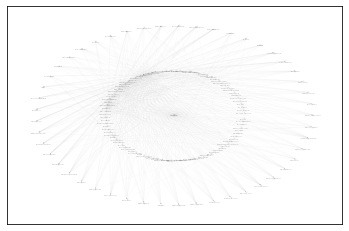

In [37]:
cases("Nosepai7")

In [44]:
def get_friends3(username, overwrite=False):
    print("trying with: " + username)
    friend_path = os.path.join("friends_data3" , username + ".txt")
    if os.path.exists(friend_path) and overwrite:
        os.remove(friend_path)
    if not path.exists(friend_path):
        friendlist = []
        attempts = 0
        while not friendlist and attempts < 5:
            start = time()
            clicommand = subprocess.run(["twint", "-u", username, "--following"], stdout=subprocess.PIPE)    #twint -u username --followers
            friends = clicommand.stdout.decode("utf-8")
            friendlist = friends.splitlines()
            final_time = time() - start  
            print(f"saving {username} friends took: {final_time // 60 :.0f}m {final_time % 60 :.0f}s")
            save_data(friend_path, friendlist)
            attempts += 1
        return friendlist
    else:
        return load_data(friend_path)

In [45]:
def cases2(profile):
    friendlist = get_friends2(profile, True)
    for friend in friendlist:
        get_friends3(friend)
    data_directory = "friends_data3"
    SocialNetwork = nx.DiGraph()
    # Carga los amigos de todos, excepto los propios como nodo en el grafo
    for filename in os.listdir(data_directory):
        friend_path = os.path.join(data_directory , filename)
        if (filename != profile + ".txt"):
            with open(friend_path, 'rb') as f:
                screen_name = filename.replace(".txt","")
                friends = pickle.load(f)
                
                SocialNetwork.add_node(screen_name,is_friend=True)

                #Añade los amigos de los amigos 
                for friend in friends:
                        # si la persona esta en la lista propia de amigos, marca el flag de is_friend en verdadero
                        if friend in friendlist:
                            is_friend = True
                        else:
                            is_friend = False

                        SocialNetwork.add_node(friend, is_friend = is_friend)
                        SocialNetwork.add_edge(screen_name,friend)
    # se busca los nodos de mayor grado, filtrando por aquellos que son amigos de la persona, con el fin de crear la lista de recomendaciones
    degrees = [{"screen_name": n[0],  "degrees": list(nx.degree(SocialNetwork,n))[0][1]} for n in nx.get_node_attributes(SocialNetwork,'is_friend').items() if n[1] == False]
    sorted_degrees = sorted(degrees, key=lambda k:k["degrees"], reverse=True)

    # se saca el top 50
    top_50 = sorted_degrees[1:50]
    print(top_50)
    # Crear un nuevo grafo con las 50 recomendaciones de amigo
    data_directory = "friends_data3"
    FavoriteSocialNetwork = nx.DiGraph()

    # Se carga la persona en el grafo
    FavoriteSocialNetwork.add_node(profile, friend_tier=0)

    # se añaden los amigos     
    with open(os.path.join(data_directory , profile + ".txt") , 'rb') as f:
            friends = pickle.load(f)
            for friend in friends:
                FavoriteSocialNetwork.add_node(friend, friend_tier=1)
                FavoriteSocialNetwork.add_edge(profile,friend)

    # se añaden los amigos de los amigos que aparecen en el top 50
    for filename in os.listdir(data_directory):
        friend_path = os.path.join(data_directory , filename)
        if (filename != profile + ".txt"):
            with open(friend_path, 'rb') as f:
                screen_name = filename.replace(".txt","")
                friends = pickle.load(f)

                for friend in friends:
                        # se agregan solo los amigos que estan en el top 50
                        if any(d["screen_name"] == friend for d in top_50):  
                            FavoriteSocialNetwork.add_node(friend, friend_tier=2)
                            FavoriteSocialNetwork.add_edge(screen_name,friend)
    # se declaran los nodos del grafo en forma de circulos
    shell_level_1 = []
    shell_level_2 = []

    # se pone el nodo a su respectivo circulo
    for n in nx.get_node_attributes(FavoriteSocialNetwork,'friend_tier').items():
        if n[1] == 2:
            shell_level_2.append(n[0])
        else:
            shell_level_1.append(n[0])

    shells = [shell_level_1,shell_level_2]
    pos = nx.shell_layout(FavoriteSocialNetwork,shells,scale=500)
    pos[profile] =[0,0]

    nx.draw_networkx(FavoriteSocialNetwork,pos= pos,node_size=1,node_color="#cfcfcf",alpha=.3,arrowsize=1,font_size=2,width=.1,edge_color="#bdbdbd")
    plt.savefig("RecomendationGraph3.png", dpi=1000)
    plt.show()

trying with: JuanitoMikoto
saving JuanitoMikoto friends took: 0m 13s
trying with: luis_ernestocg
trying with: JapanEmb_Mexico
trying with: japan
trying with: TITOmanan
trying with: misssalada
trying with: warmisdelmas
trying with: Lafofi23
trying with: Nux_Taku
trying with: lokhelle
trying with: Herzspalter
trying with: HyugaDarling
trying with: zold6yck
trying with: xCotarelo
trying with: messi1000itar
trying with: pisxuenzo15
trying with: santisoracco
trying with: KikeHernan1
trying with: 5REDVELVETSPAIN
trying with: REDVELVET_Peru
trying with: Ruru_cos98
trying with: yaquehernandez
trying with: missssspurple
trying with: eljulius2211
trying with: HumorFPC
trying with: LizPater17
trying with: Sin_amiwis
trying with: secsaludvalle
trying with: bobinpain
trying with: blancabertuf
trying with: iamxiovni
trying with: Rociobeeeel
trying with: wholesxmemoon
trying with: The_PonceOvalle
trying with: TWICEMx_FC
trying with: misayeon
trying with: cIownces
trying with: ByMisterWither
trying wi

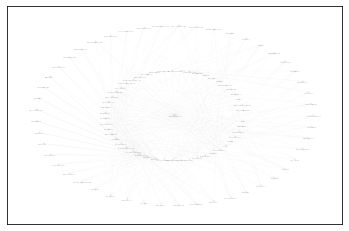

In [46]:
cases2("JuanitoMikoto")